In [9]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd

In [10]:
reco_position_dic = {
    0: [-11.6415, 55.313, 951.861],
    1: [-11.8345, 55.822, 911.065],
    2: [-11.4175, 27.607, 989.712],
    3: [-12.1765, -0.722, 865.599],
    4: [-11.4545, -28.625, 990.356],
    5: [-11.7755, -56.514, 951.865],
    6: [-12.0585, -56.309, 911.939],
    7: [-12.5405, 55.625, 751.884],
    8: [-12.6615, 55.8, 711.073],
    9: [-12.3045, -0.502, 796.208],
    10: [-12.6245, -0.051, 664.203],
    11: [-12.6045, -56.284, 751.905],
    12: [-12.6125, -56.408, 711.274],
    13: [-12.8735, 55.822, 540.929],
    14: [-12.9835, 55.771, 500.134],
    15: [-12.6515, -0.549, 585.284],
    16: [-12.6185, -0.875, 453.096],
    17: [-12.6205, -56.205, 540.616],
    18: [-12.5945, -56.323, 500.221],
    19: [-13.1865, 54.693, 328.212],
    20: [-13.4175, 54.646, 287.976],
    21: [-13.0855, -0.706, 373.839],
    22: [-13.1505, -0.829, 242.014],
    23: [-12.6485, -57.022, 328.341],
    24: [-13.0075, -56.261, 287.639],
    25: [-13.3965, 55.249, 128.354],
    26: [-13.5415, 55.249, 87.7605],
    27: [-13.4345, 27.431, 51.1015],
    28: [-13.4415, -0.303, 173.743],
    29: [-13.1525, -28.576, 50.4745],
    30: [-13.2784, -56.203, 128.18],
    31: [-13.2375, -56.615, 87.8695],
}

true_position_dic = {
    0: [-11.4545, -28.625, 990.356],
    1: [-11.4175, 27.607, 989.712],
    2: [-11.7755, -56.514, 951.865],
    3: [-11.6415, 55.313, 951.861],
    4: [-12.0585, -56.309, 911.939],
    5: [-11.8345, 55.822, 911.065],
    6: [-12.1765, -0.722, 865.599],
    7: [-12.3045, -0.502, 796.208],
    8: [-12.6045, -56.284, 751.905],
    9: [-12.5405, 55.625, 751.884],
    10: [-12.6125, -56.408, 711.274],
    11: [-12.6615, 55.8, 711.073],
    12: [-12.6245, -0.051, 664.203],
    13: [-12.6515, -0.549, 585.284],
    14: [-12.8735, 55.822, 540.929],
    15: [-12.6205, -56.205, 540.616],
    16: [-12.5945, -56.323, 500.221],
    17: [-12.9835, 55.771, 500.134],
    18: [-12.6185, -0.875, 453.096],
    19: [-13.0855, -0.706, 373.839],
    20: [-12.6485, -57.022, 328.341],
    21: [-13.1865, 54.693, 328.212],
    22: [-13.4175, 54.646, 287.976],
    23: [-13.0075, -56.261, 287.639],
    24: [-13.1505, -0.829, 242.014],
    25: [-13.4415, -0.303, 173.743],
    26: [-13.3965, 55.249, 128.354],
    27: [-13.2784, -56.203, 128.18],
    28: [-13.2375, -56.615, 87.8695],
    29: [-13.5415, 55.249, 87.7605],
    30: [-13.4345, 27.431, 51.1015],
    31: [-13.1525, -28.576, 50.4745],
}



In [11]:
f = uproot.open("/Users/katherinepulido/Desktop/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_NC_pi0_overlay_may8_reco2_hist_62280465_snapshot.root")
f["nuselection"]["NeutrinoSelectionFilter"].items()

[('selected', <TBranch 'selected' at 0x000126bfb670>),
 ('run', <TBranch 'run' at 0x000126c0e310>),
 ('sub', <TBranch 'sub' at 0x000126b94a60>),
 ('evt', <TBranch 'evt' at 0x000126b947f0>),
 ('trk_id', <TBranch 'trk_id' at 0x000126bbd760>),
 ('shr_id', <TBranch 'shr_id' at 0x000126bbd7c0>),
 ('trk2_id', <TBranch 'trk2_id' at 0x000126c372e0>),
 ('shr2_id', <TBranch 'shr2_id' at 0x000126c37a90>),
 ('trk3_id', <TBranch 'trk3_id' at 0x000126c2f280>),
 ('shr3_id', <TBranch 'shr3_id' at 0x000126c2fa30>),
 ('shr_energy_tot', <TBranch 'shr_energy_tot' at 0x000126c30220>),
 ('shr_energy', <TBranch 'shr_energy' at 0x000126c309d0>),
 ('shr_energy_second', <TBranch 'shr_energy_second' at 0x000126c2d1c0>),
 ('shr_energy_third', <TBranch 'shr_energy_third' at 0x000126c2d970>),
 ('shr_energy_tot_cali', <TBranch 'shr_energy_tot_cali' at 0x000126c3a160>),
 ('shr_energy_cali', <TBranch 'shr_energy_cali' at 0x000126c3a910>),
 ('shr_energy_second_cali',
  <TBranch 'shr_energy_second_cali' at 0x000126c3313

In [12]:
f["nuselection"]["NeutrinoSelectionFilter"]["flash_pe_flash_matching"].array()

<Array [643, 1.81e+03, 5.91e+03, ..., 3.25e+03, 448] type='43212 * float32'>

In [13]:
f["nuselection"]["NeutrinoSelectionFilter"]["flash_pe_flash_matching_v"].array()

<Array [[0.564, 0.00667, ..., 50.3, 37.5], ...] type='43212 * var * float32'>

In [14]:
f["nuselection"]["NeutrinoSelectionFilter"]["slice_pe_flash_matching_v"].array()


<Array [[0.0199, 0, 0.02, ..., 14.9, 15.5], ...] type='43212 * var * float32'>

In [15]:
reco_position_dic[0]

[-11.6415, 55.313, 951.861]

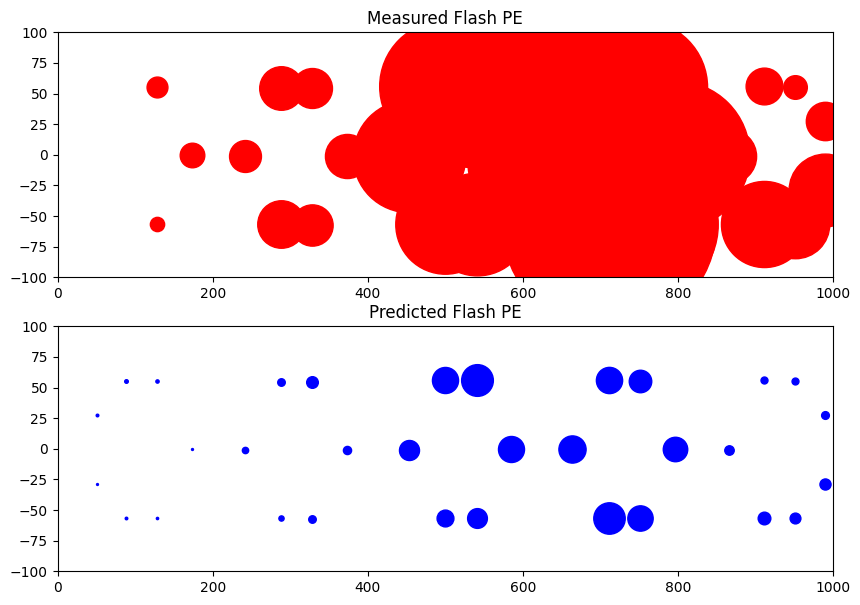

In [16]:
event_id = 8

fig, axs = plt.subplots(2, 1, figsize=(10, 7))

meas_pmt_array = f["nuselection"]["NeutrinoSelectionFilter"]["flash_pe_flash_matching_v"].arrays(library="np")["flash_pe_flash_matching_v"]
pred_pmt_array = f["nuselection"]["NeutrinoSelectionFilter"]["slice_pe_flash_matching_v"].arrays(library="np")["slice_pe_flash_matching_v"]

for pmt_id in range(32):
    reco_pmt_position = reco_position_dic[pmt_id]
    meas_flash_pe = meas_pmt_array[event_id][pmt_id]
    pred_flash_pe = pred_pmt_array[event_id][pmt_id]
    size_scale = 75
    axs[0].scatter(reco_pmt_position[2], reco_pmt_position[1], color="red", s=meas_flash_pe * size_scale)
    axs[1].scatter(reco_pmt_position[2], reco_pmt_position[1], color="blue", s=pred_flash_pe * size_scale)

axs[0].set_xlim(0, 1000)
axs[0].set_ylim(-100, 100)
axs[1].set_xlim(0, 1000)
axs[1].set_ylim(-100, 100)

axs[0].set_title("Measured Flash PE")
axs[1].set_title("Predicted Flash PE")

plt.show()